In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('ETL_ETIQUETAS.csv')
dfEs = pd.read_csv('ETL_ESPECIFICACIONES.csv')

In [78]:
df.columns.values

array(['IdItem', 'Tiempo_Jugado_Promedio', 'Recomendado', 'Precio',
       'Etiqueta_2D', 'Etiqueta_Action', 'Etiqueta_Adventure',
       'Etiqueta_Anime', 'Etiqueta_Arcade', 'Etiqueta_Atmospheric',
       'Etiqueta_Casual', 'Etiqueta_Classic', 'Etiqueta_Co-op',
       'Etiqueta_Comedy', 'Etiqueta_Controller', 'Etiqueta_Cute',
       'Etiqueta_Difficult', 'Etiqueta_Early Access',
       'Etiqueta_Exploration', 'Etiqueta_FPS', 'Etiqueta_Family Friendly',
       'Etiqueta_Fantasy', 'Etiqueta_Female Protagonist',
       'Etiqueta_First-Person', 'Etiqueta_Free to Play', 'Etiqueta_Funny',
       'Etiqueta_Gore', 'Etiqueta_Great Soundtrack', 'Etiqueta_Horror',
       'Etiqueta_Indie', 'Etiqueta_Local Co-Op',
       'Etiqueta_Local Multiplayer', 'Etiqueta_Massively Multiplayer',
       'Etiqueta_Multiplayer', 'Etiqueta_Online Co-Op',
       'Etiqueta_Open World', 'Etiqueta_Pixel Graphics',
       'Etiqueta_Platformer', 'Etiqueta_Point & Click', 'Etiqueta_Puzzle',
       'Etiqueta_RPG', 'Etiqu

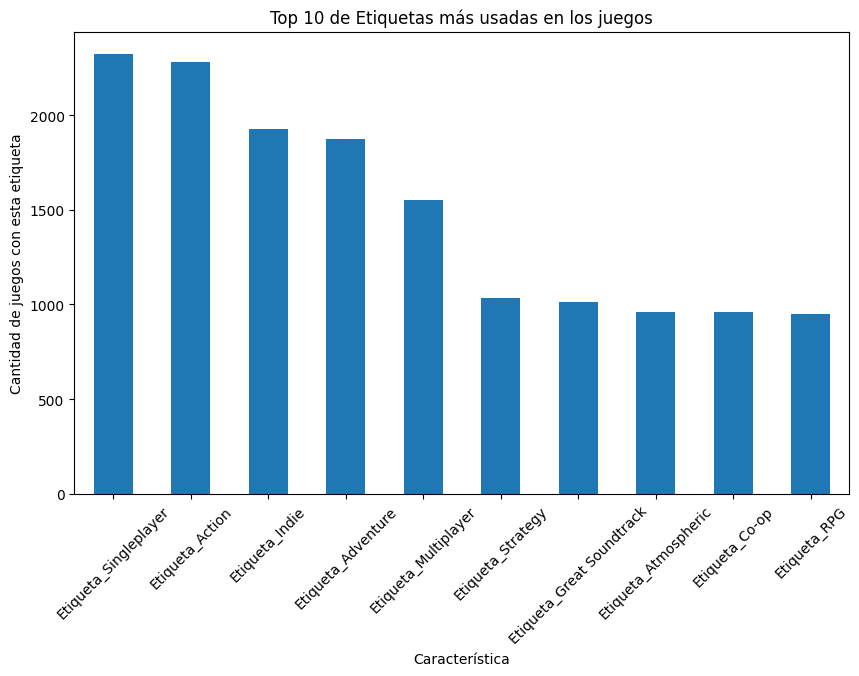

In [34]:
caracteristicas_binarias = df.drop(['IdItem', 'Precio', 'Tiempo_Jugado_Promedio', 'Recomendado'], axis=1)
# Suma los valores de cada característica binaria
suma_caracteristicas = caracteristicas_binarias.sum()
suma_caracteristicas = suma_caracteristicas.sort_values(ascending=False)

# Tomar solo las 10 primeras características binarias
suma_caracteristicas = suma_caracteristicas.head(10)
plt.figure(figsize=(10, 6))
suma_caracteristicas.plot(kind='bar', stacked=True)
plt.title('Top 10 de Etiquetas más usadas en los juegos')
plt.xlabel('Característica')
plt.ylabel('Cantidad de juegos con esta etiqueta')
plt.xticks(rotation=45)
plt.show()

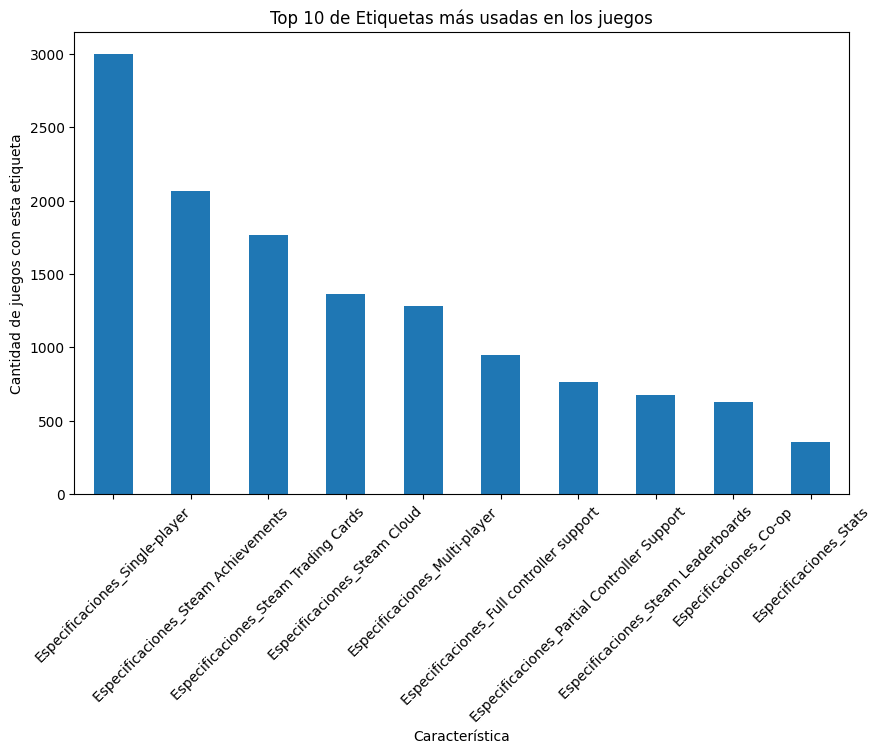

In [35]:
caracteristicas_binarias = dfEs.drop(['IdItem', 'Precio', 'Tiempo_Jugado_Promedio', 'Recomendado'], axis=1)

# Suma los valores de cada característica binaria
suma_caracteristicas = caracteristicas_binarias.sum()
suma_caracteristicas = suma_caracteristicas.sort_values(ascending=False)

# Tomar solo las 10 primeras características binarias
suma_caracteristicas = suma_caracteristicas.head(10)
plt.figure(figsize=(10, 6))
suma_caracteristicas.plot(kind='bar', stacked=True)
plt.title('Top 10 de Etiquetas más usadas en los juegos')
plt.xlabel('Característica')
plt.ylabel('Cantidad de juegos con esta etiqueta')
plt.xticks(rotation=45)
plt.show()

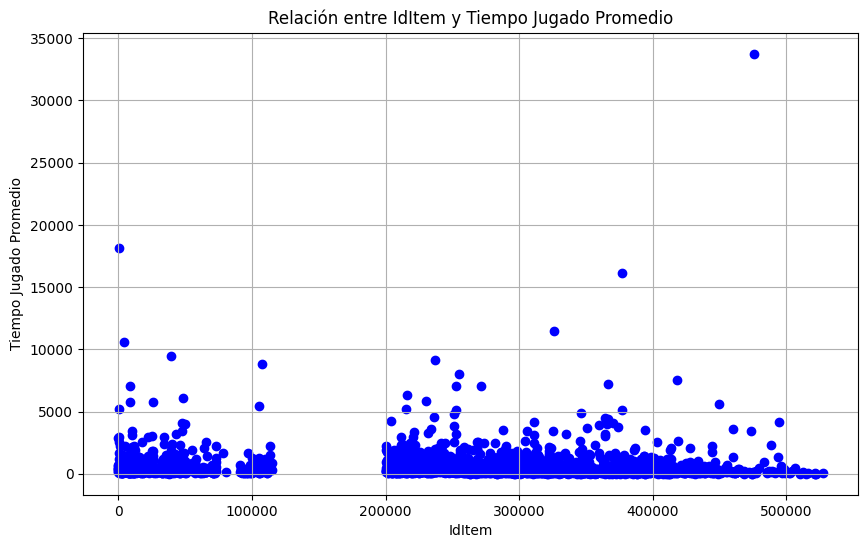

In [64]:
dfEt_Tiempo_Item = df.iloc[:,:2]
dfEt_Tiempo_Item = dfEt_Tiempo_Item.drop_duplicates()
id_items = dfEt_Tiempo_Item["IdItem"]
tiempo_jugado_promedio = dfEt_Tiempo_Item["Tiempo_Jugado_Promedio"]
plt.figure(figsize=(10, 6))
plt.scatter(id_items, tiempo_jugado_promedio, color='blue')
plt.title('Relación entre IdItem y Tiempo Jugado Promedio')
plt.xlabel('IdItem')
plt.ylabel('Tiempo Jugado Promedio')
plt.grid(True)
plt.show()

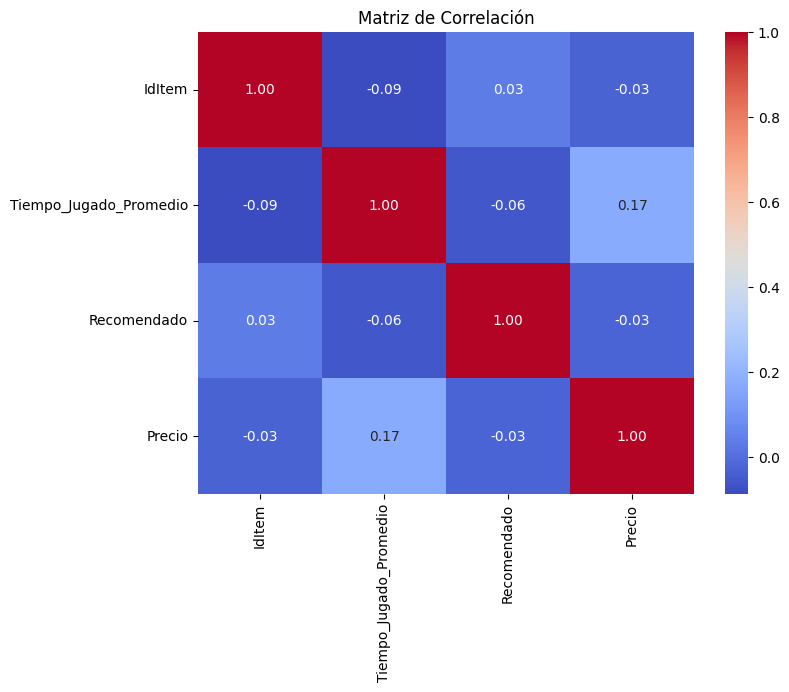

In [62]:
dfCorrelacion = df.iloc[:,:4]
correlacion = dfCorrelacion.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

La correlación entre 'IdItem' y 'Tiempo_Jugado_Promedio' es -0.087655, lo cual indica una correlación muy débil y prácticamente insignificante.

La correlación entre 'IdItem' y 'Recomendado' es 0.034700, lo cual también indica una correlación muy débil y prácticamente insignificante.

La correlación entre 'IdItem' y 'Precio' es -0.028189, lo que confirma nuevamente una correlación muy débil y prácticamente insignificante.

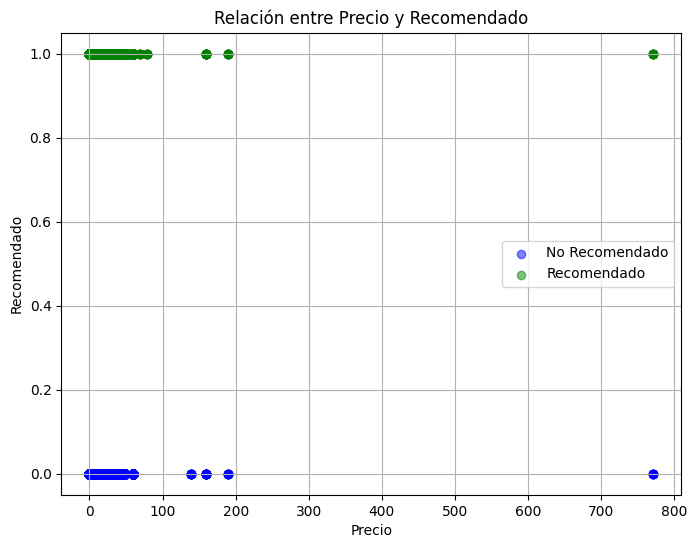

In [67]:
# Dividir los datos en dos grupos: recomendados y no recomendados
recomendados = df[df['Recomendado'] == 1]
no_recomendados = df[df['Recomendado'] == 0]

# Crear un diagrama de dispersión con colores diferentes para los puntos recomendados y no recomendados
plt.figure(figsize=(8, 6))
plt.scatter(no_recomendados['Precio'], no_recomendados['Recomendado'], color='blue', alpha=0.5, label='No Recomendado')
plt.scatter(recomendados['Precio'], recomendados['Recomendado'], color='green', alpha=0.5, label='Recomendado')
plt.xlabel('Precio')
plt.ylabel('Recomendado')
plt.title('Relación entre Precio y Recomendado')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_4369/528904146.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recomendados_por_rango = recomendados.groupby(pd.cut(recomendados['Precio'], bins)).size()
/tmp/ipykernel_4369/528904146.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_recomendados_por_rango = no_recomendados.groupby(pd.cut(no_recomendados['Precio'], bins)).size()


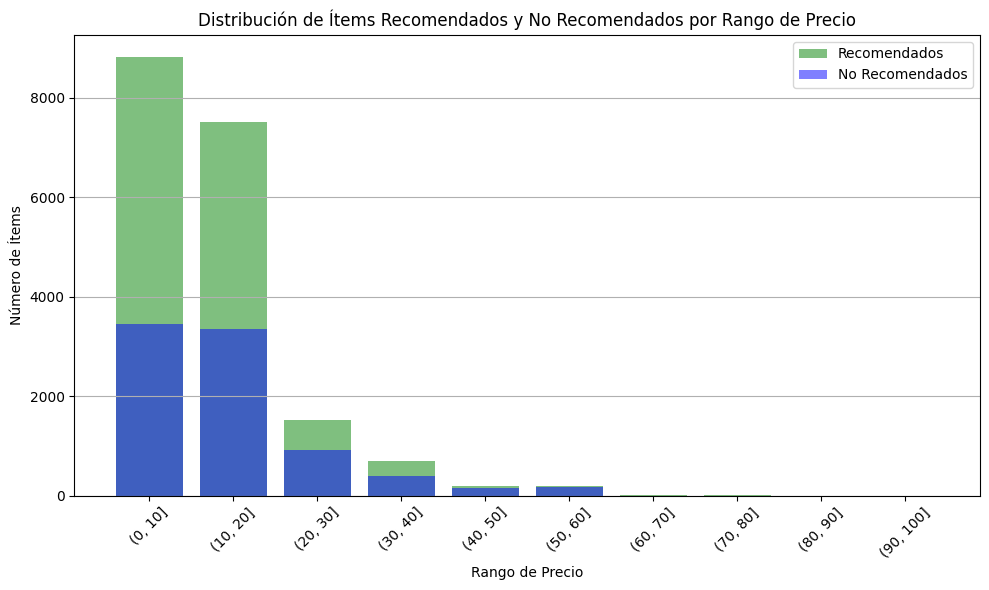

In [68]:
# Dividir los datos en dos grupos: recomendados y no recomendados
recomendados = df[df['Recomendado'] == 1]
no_recomendados = df[df['Recomendado'] == 0]

# Definir los rangos de precios
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Calcular el número de ítems recomendados y no recomendados en cada rango de precios
recomendados_por_rango = recomendados.groupby(pd.cut(recomendados['Precio'], bins)).size()
no_recomendados_por_rango = no_recomendados.groupby(pd.cut(no_recomendados['Precio'], bins)).size()

# Crear un gráfico de barras para visualizar la distribución de ítems recomendados y no recomendados por rango de precios
plt.figure(figsize=(10, 6))
plt.bar(recomendados_por_rango.index.astype(str), recomendados_por_rango.values, color='green', alpha=0.5, label='Recomendados')
plt.bar(no_recomendados_por_rango.index.astype(str), no_recomendados_por_rango.values, color='blue', alpha=0.5, label='No Recomendados')
plt.xlabel('Rango de Precio')
plt.ylabel('Número de Ítems')
plt.title('Distribución de Ítems Recomendados y No Recomendados por Rango de Precio')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

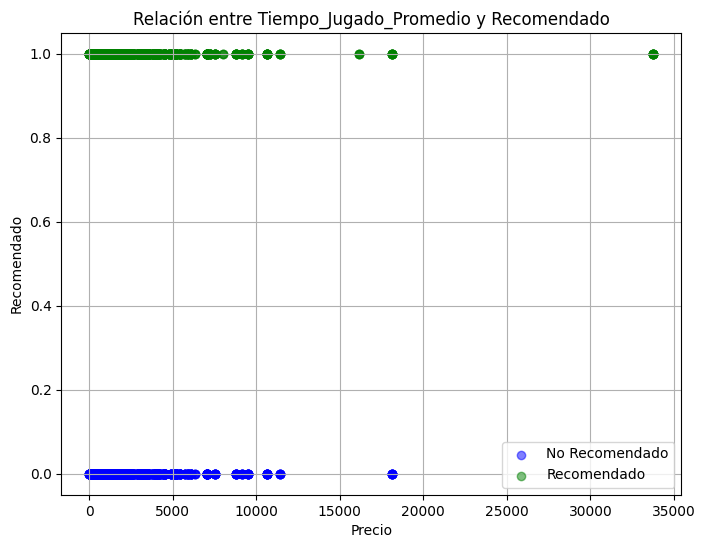

In [71]:
# Dividir los datos en dos grupos: recomendados y no recomendados
recomendados = df[df['Recomendado'] == 1]
no_recomendados = df[df['Recomendado'] == 0]

# Crear un diagrama de dispersión con colores diferentes para los puntos recomendados y no recomendados
plt.figure(figsize=(8, 6))
plt.scatter(no_recomendados['Tiempo_Jugado_Promedio'], no_recomendados['Recomendado'], color='blue', alpha=0.5, label='No Recomendado')
plt.scatter(recomendados['Tiempo_Jugado_Promedio'], recomendados['Recomendado'], color='green', alpha=0.5, label='Recomendado')
plt.xlabel('Precio')
plt.ylabel('Recomendado')
plt.title('Relación entre Tiempo_Jugado_Promedio y Recomendado')
plt.legend()
plt.grid(True)
plt.show()